# Mercurialis annua x huetii crosses

### Raw data

So the data is for annua x huetii crosses. Males are always annua. 

There are 6 families in total (1, 8, 9, 12, 13 and 14). The number of offspring in each family is as follows:

Family 1: 138  
Family 8: 15  
Family 9: 19  
Family 12: 123  
Family 13: 249  
Family 14: 152  

So, even if half of the samples are shit, we still have huge families here! I thik Families 8 and 9 probably won't be too useful. 

Used Mathias' "strict" demultiplexing

The amount of data between samples looks very variable some with only a few thousand reads, some with > 2M. 
- How many loci do we expect from this genome?  
- What sort of coverage do we get for ~2M reads?


## Stacks

Run through with default Ustacks and Cstacks parameters to start with. 

Populations run on each family separately (will create whitelists from this).

Initial Populations run using Fam_1 with -r 0.8 and -p 3 (where 3 pops are offspring, father, mother). 

Only 17 markers meet these criteria! So I need to be a lot less strict in order to first find the samples that are causing so much dropout. Hopefully I can keep enough of them. 

In the end I retained loci which were present in the mother, father, and ONLY 30% of offspring!!


In [1]:
%matplotlib inline
from __future__ import division
from IPython.display import Image
import vcf
import MISC_RAD_tools as MISC

In [2]:
vcf_path = "/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/Fam_1/batch_1.vcf"

## Taking a look at the data

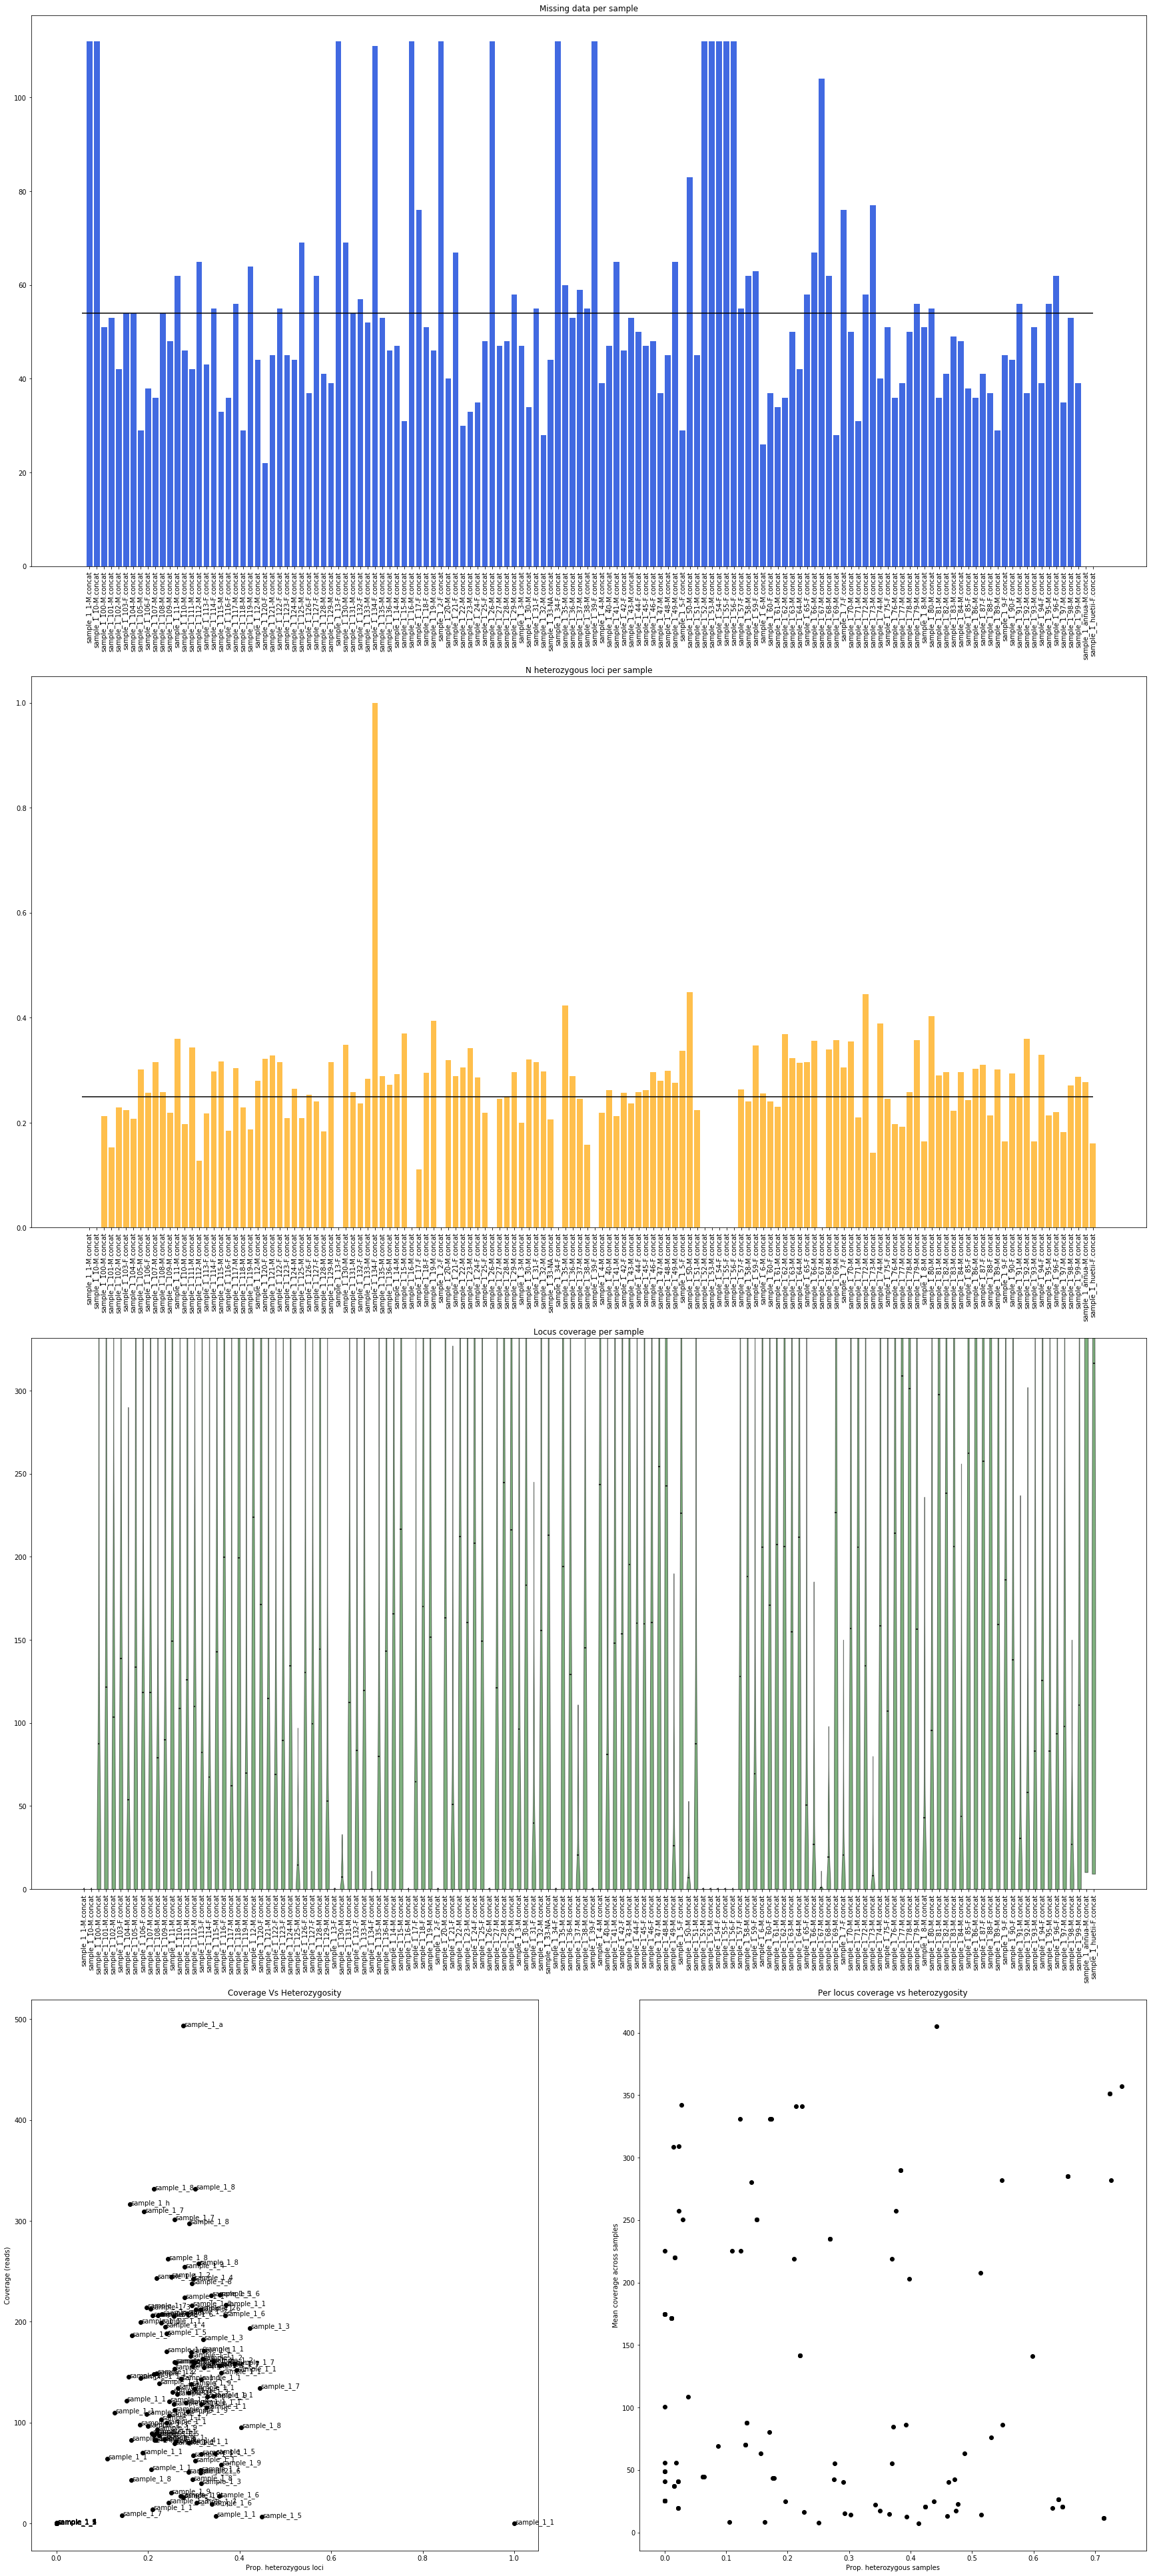

#### DONE ####

Number of Loci = 112
Average coverage = 126.938082298 reads


In [3]:
MISC.Summary_plotter(vcf_path, "1111", False)

In [10]:
vcf_path = "/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/Fam_12/batch_1.vcf"

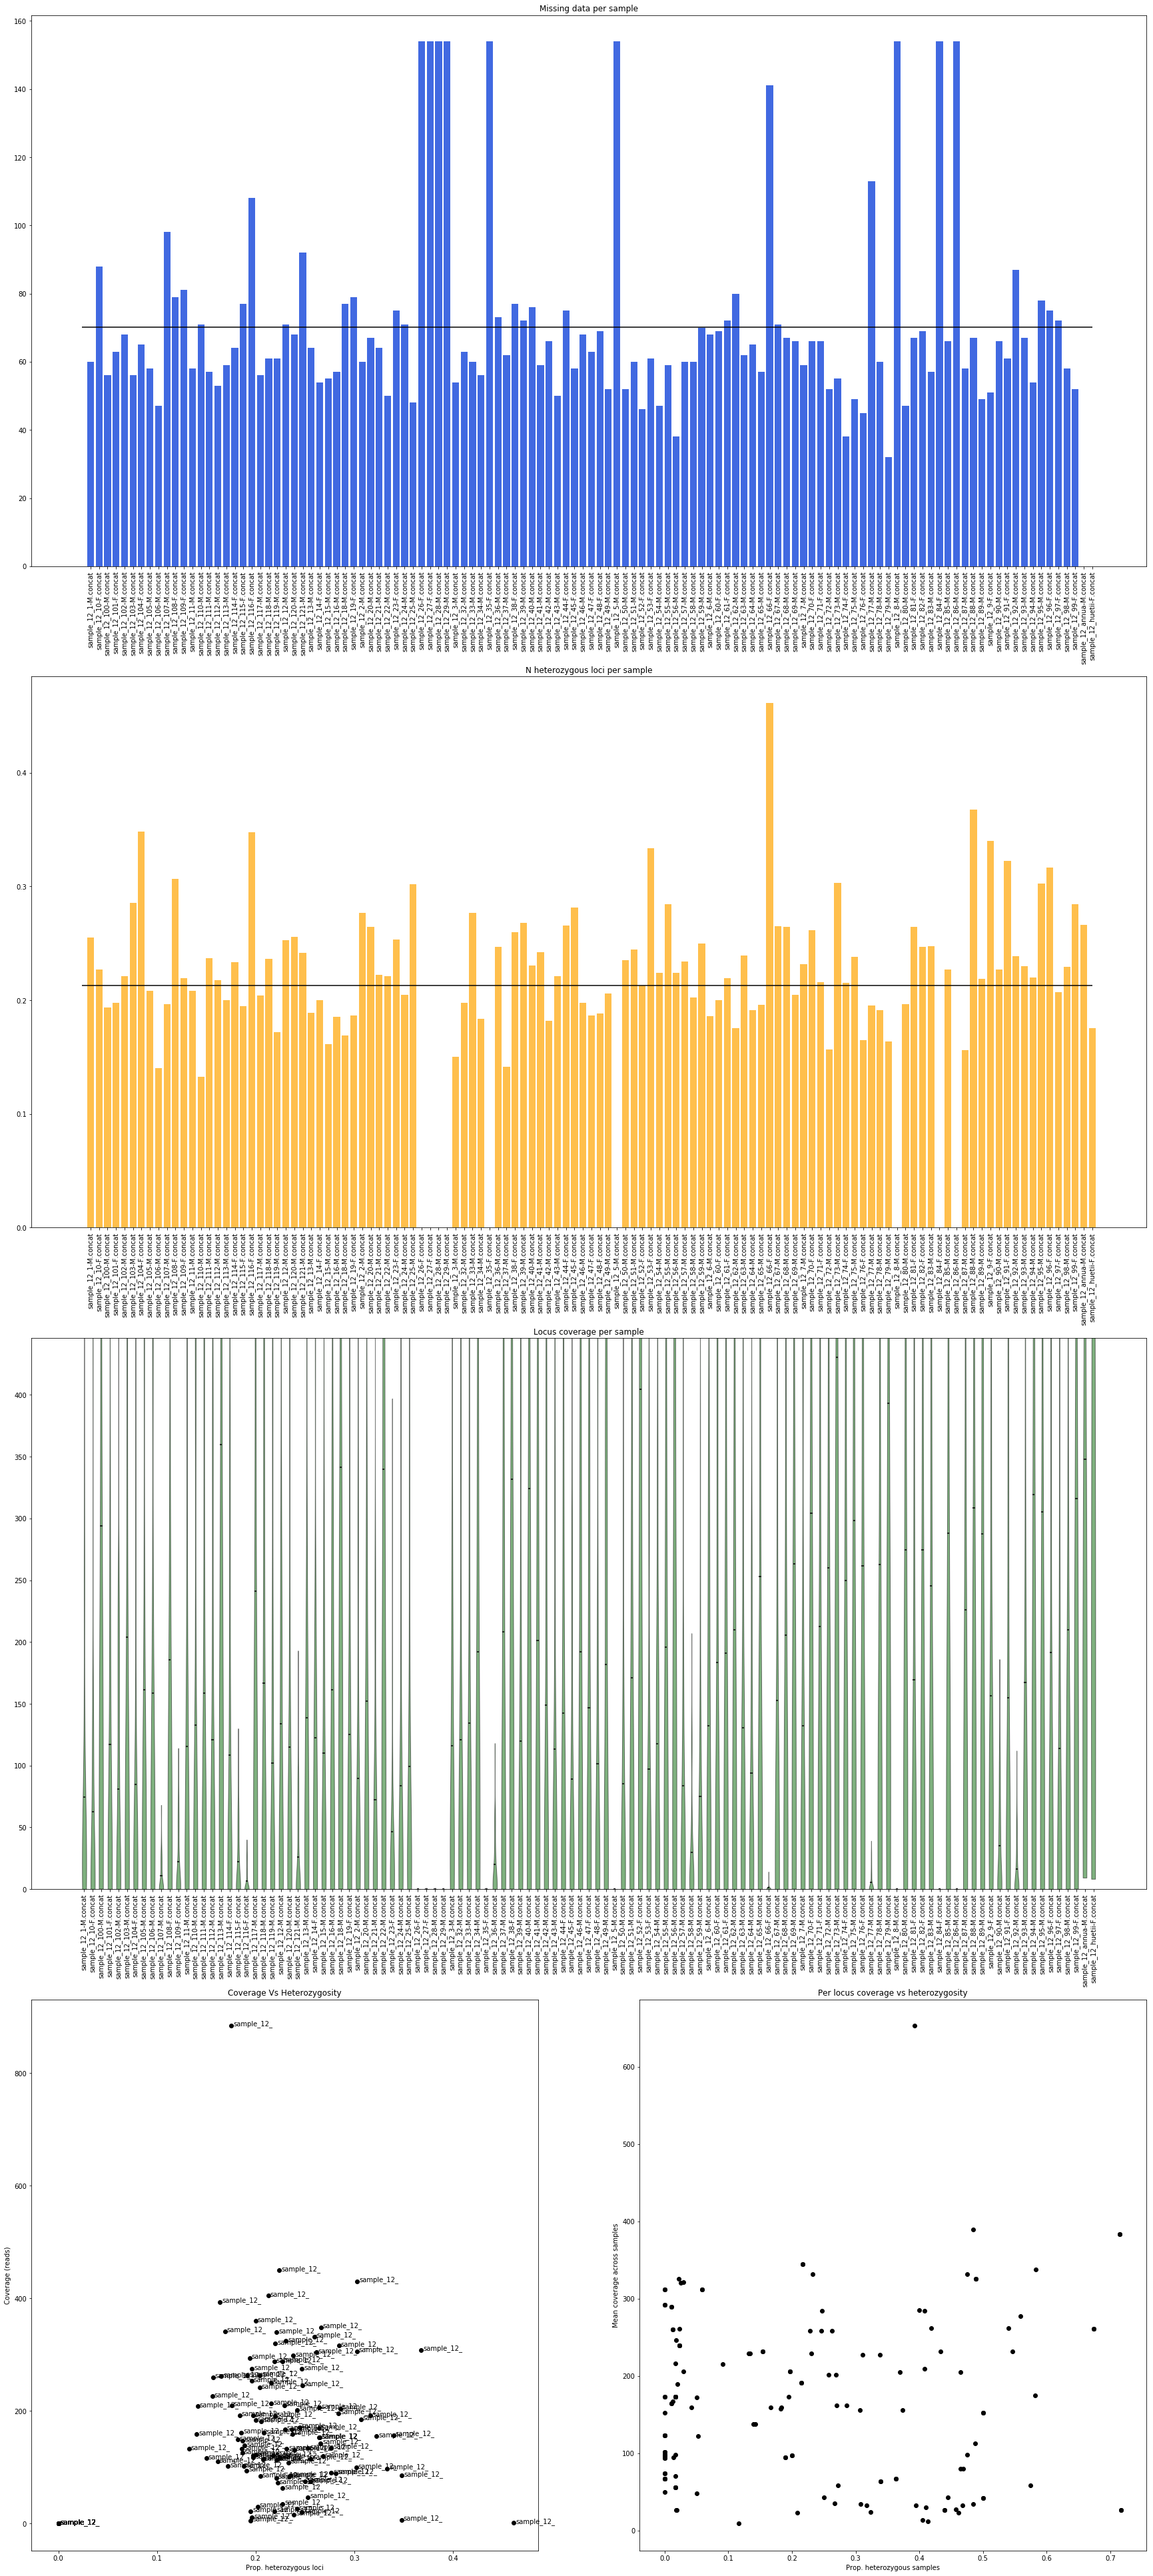

#### DONE ####

Number of Loci = 154
Average coverage = 165.192731638 reads


In [11]:
MISC.Summary_plotter(vcf_path, "1111", False)

In [11]:
vcf_path = "/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/Fam_13/batch_1.vcf"

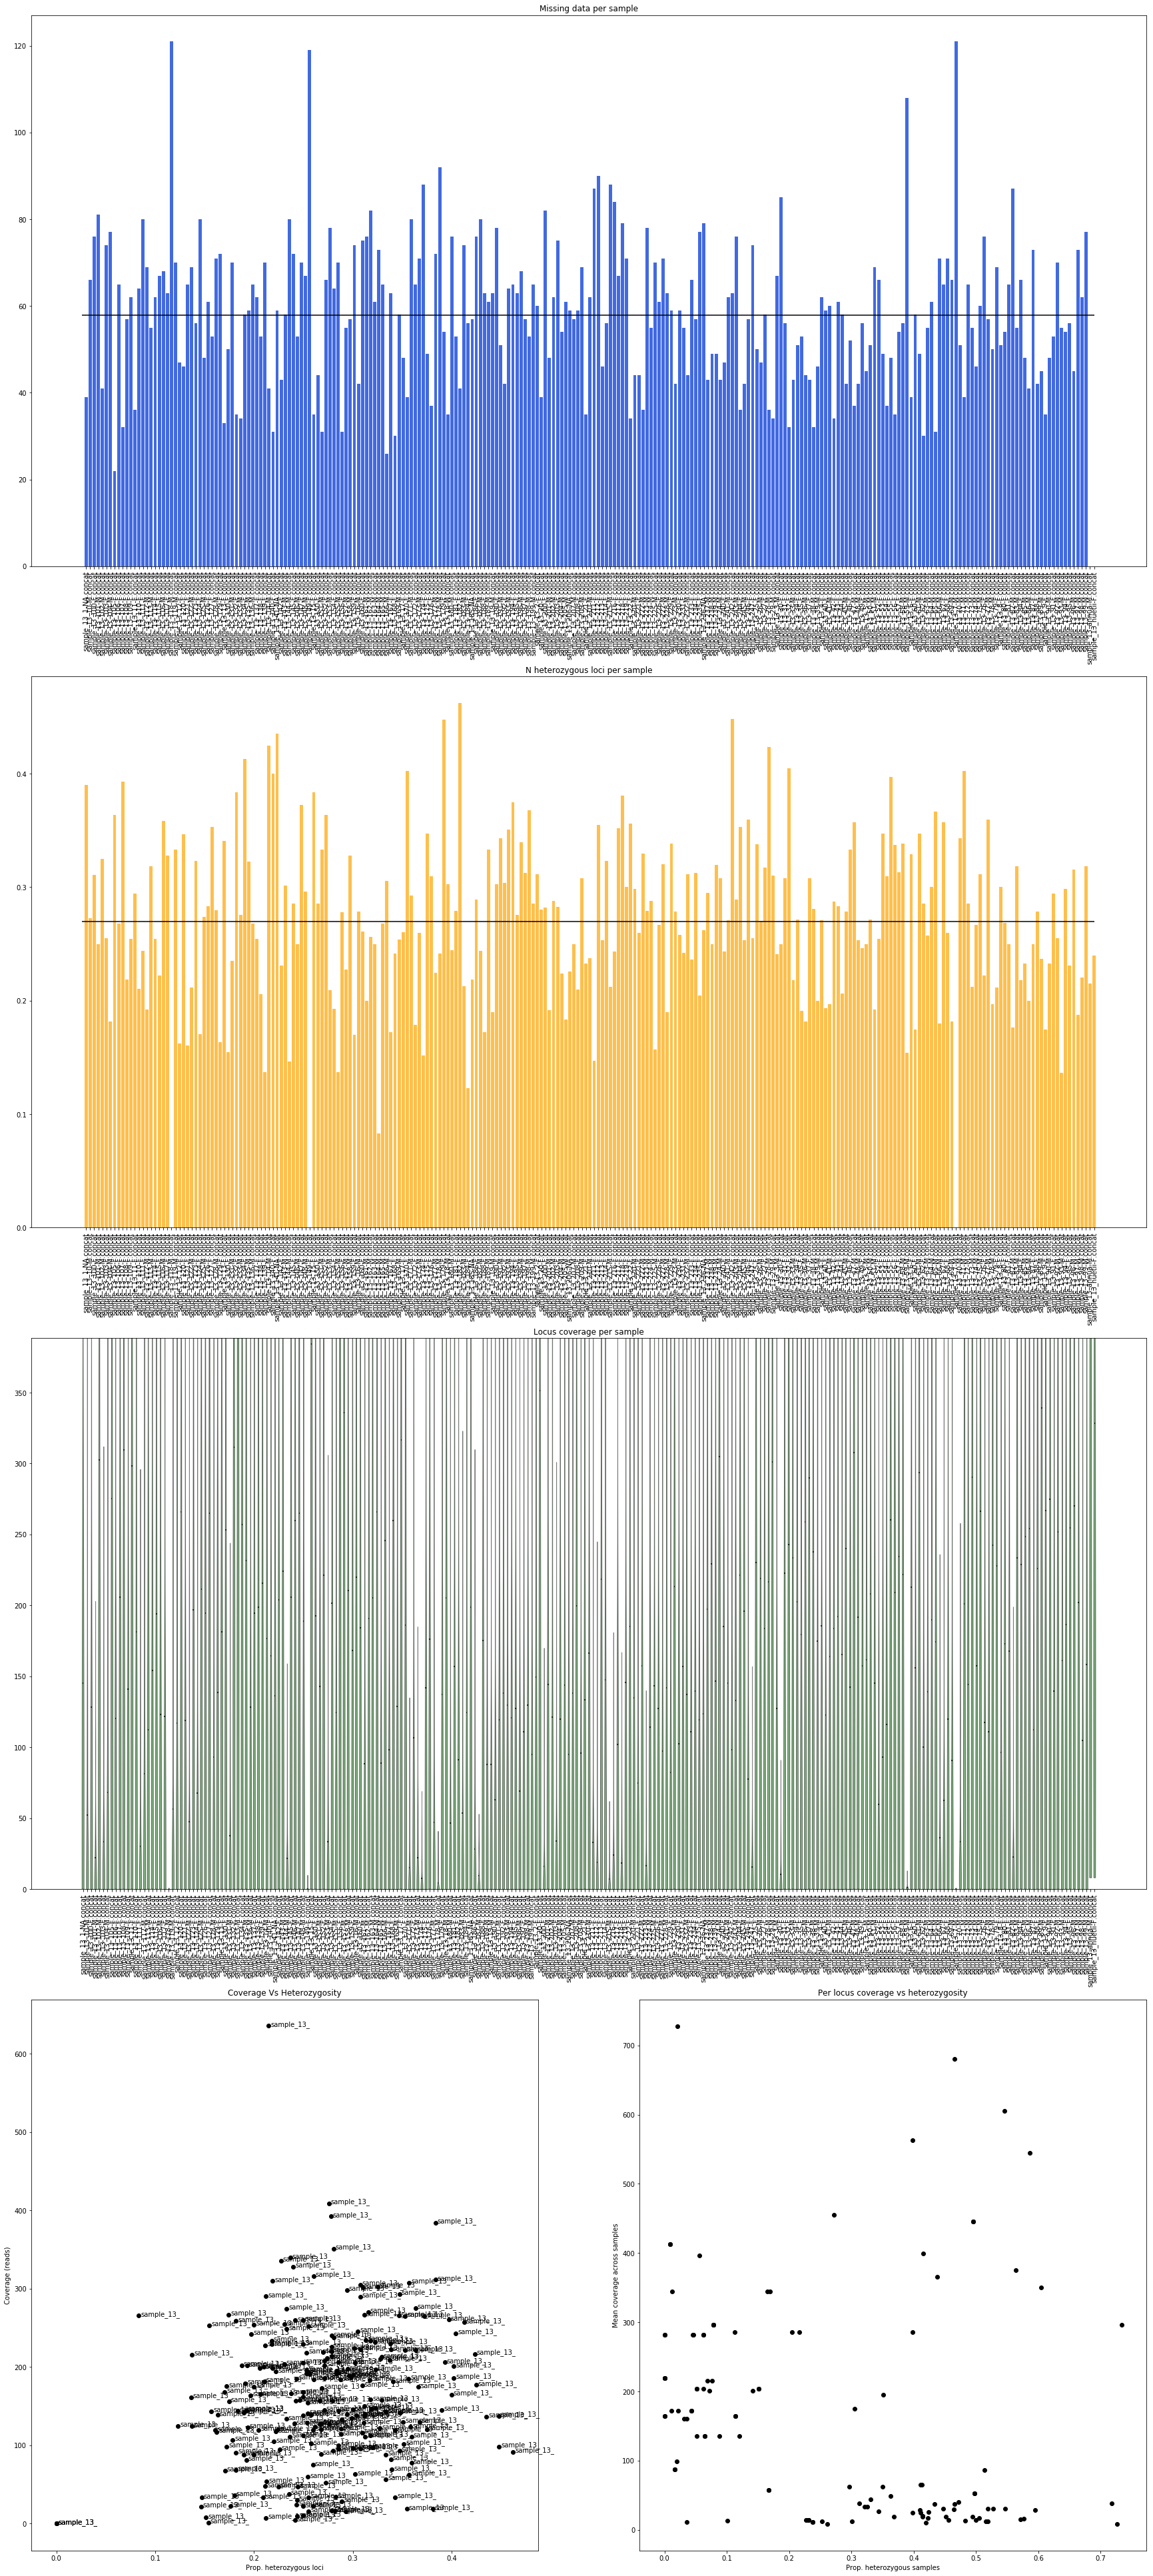

#### DONE ####

Number of Loci = 121
Average coverage = 159.837664708 reads


In [12]:
MISC.Summary_plotter(vcf_path, "1111", False)

In [4]:
vcf_path = "/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/Populations_parents/batch_1.vcf"

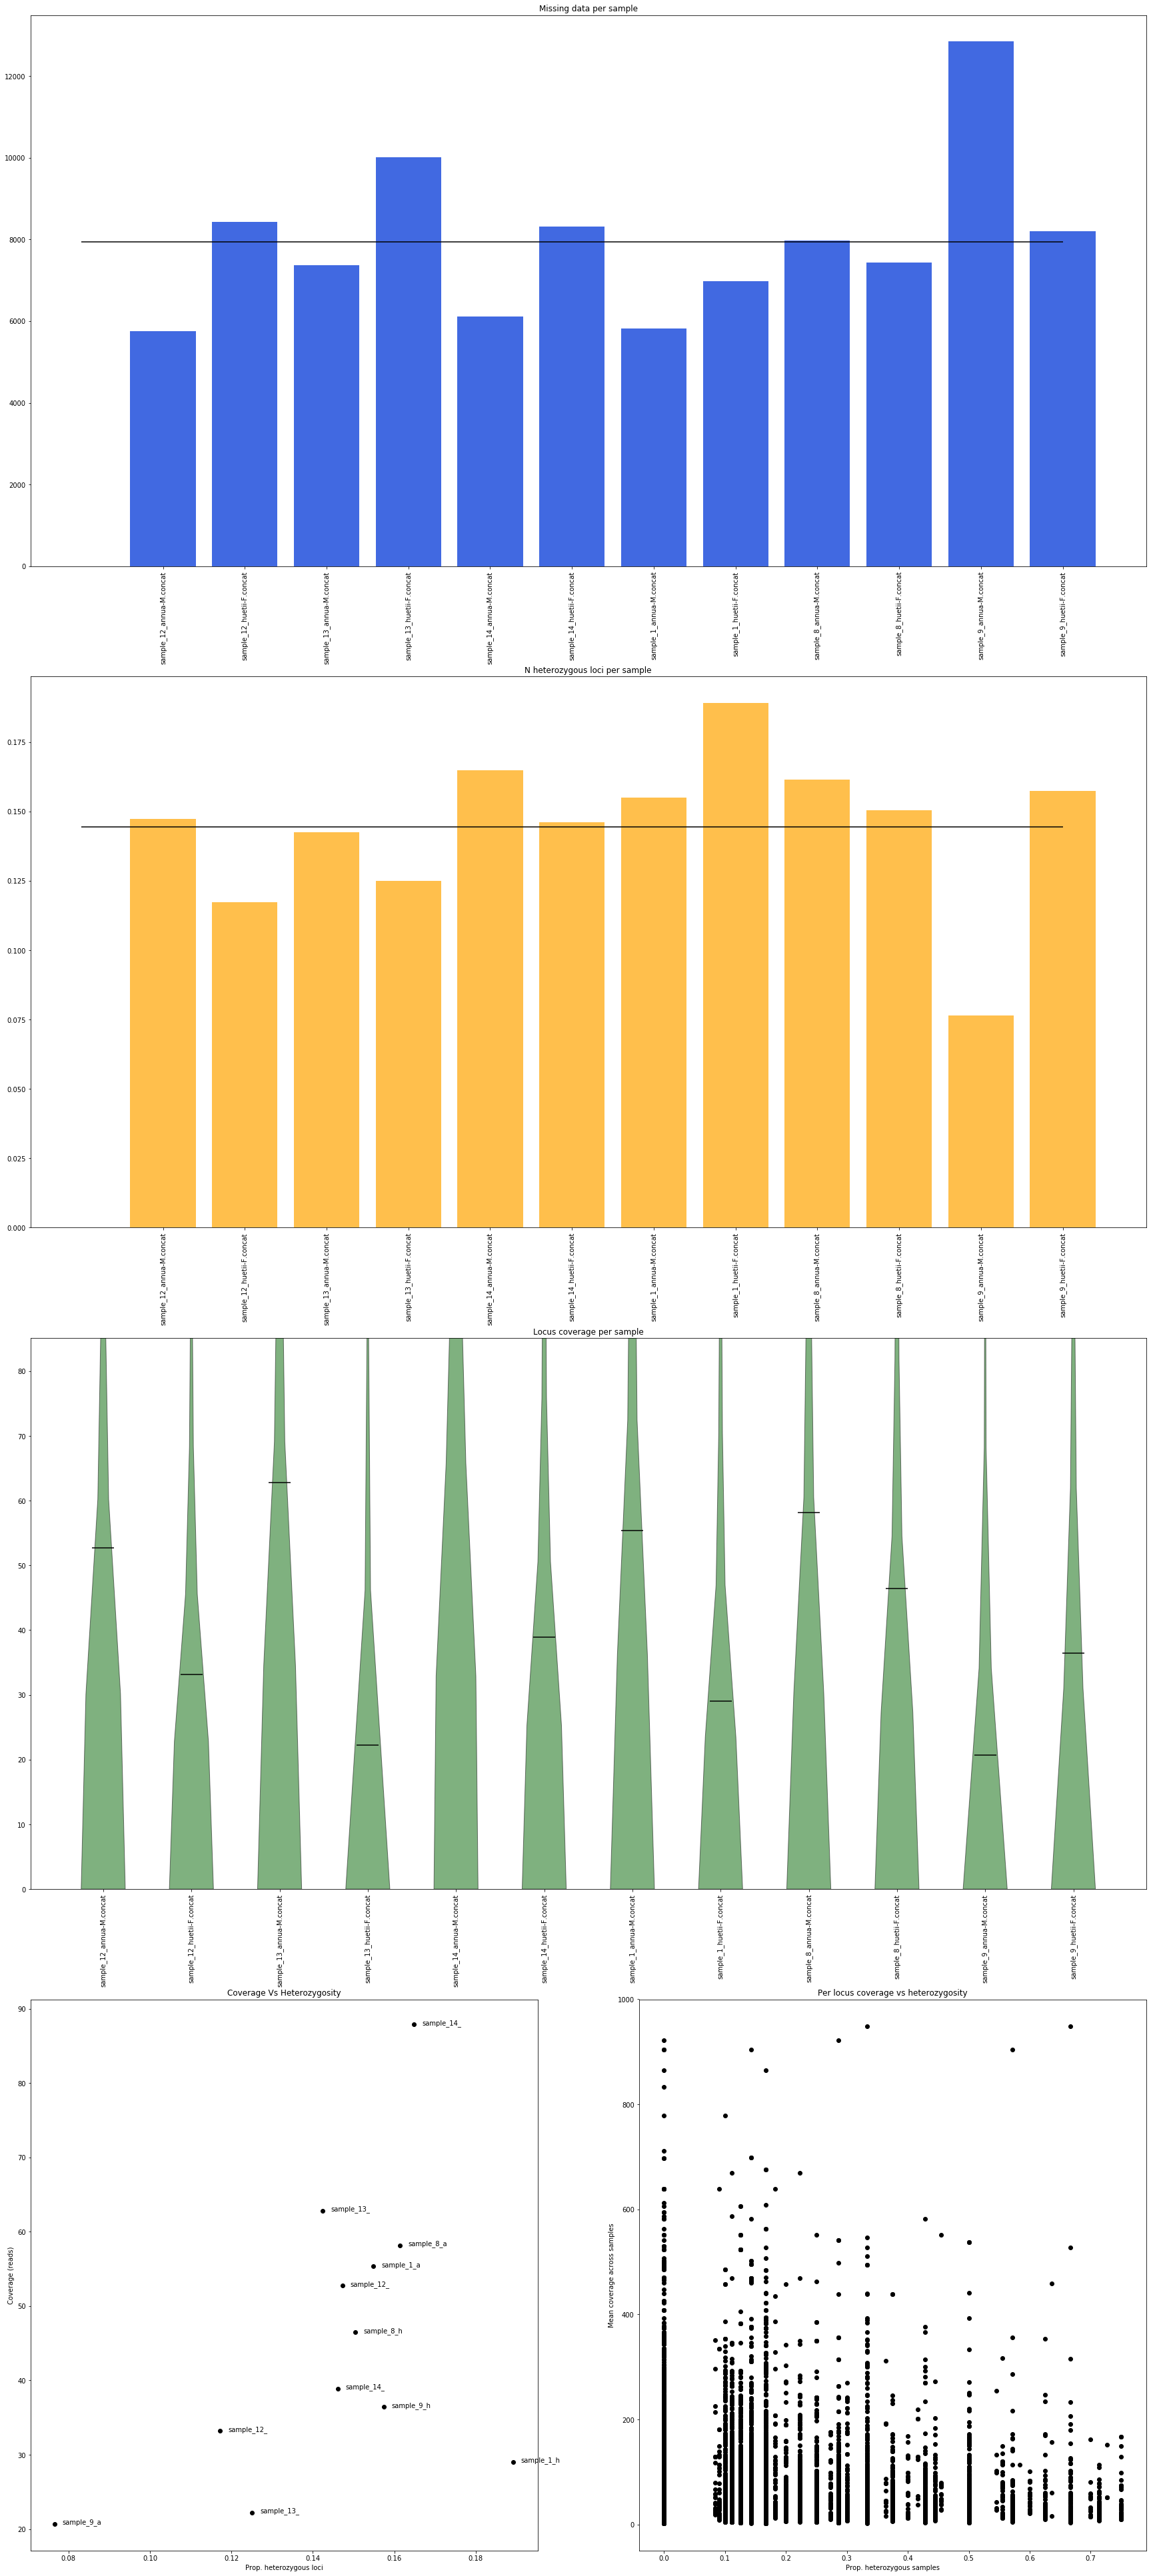

#### DONE ####

Number of Loci = 20713
Average coverage = 45.3266185487 reads


In [5]:
MISC.Summary_plotter(vcf_path, "1111", False)

In [6]:
vcf_path = "/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/Populations_parents_m8/batch_1.vcf"

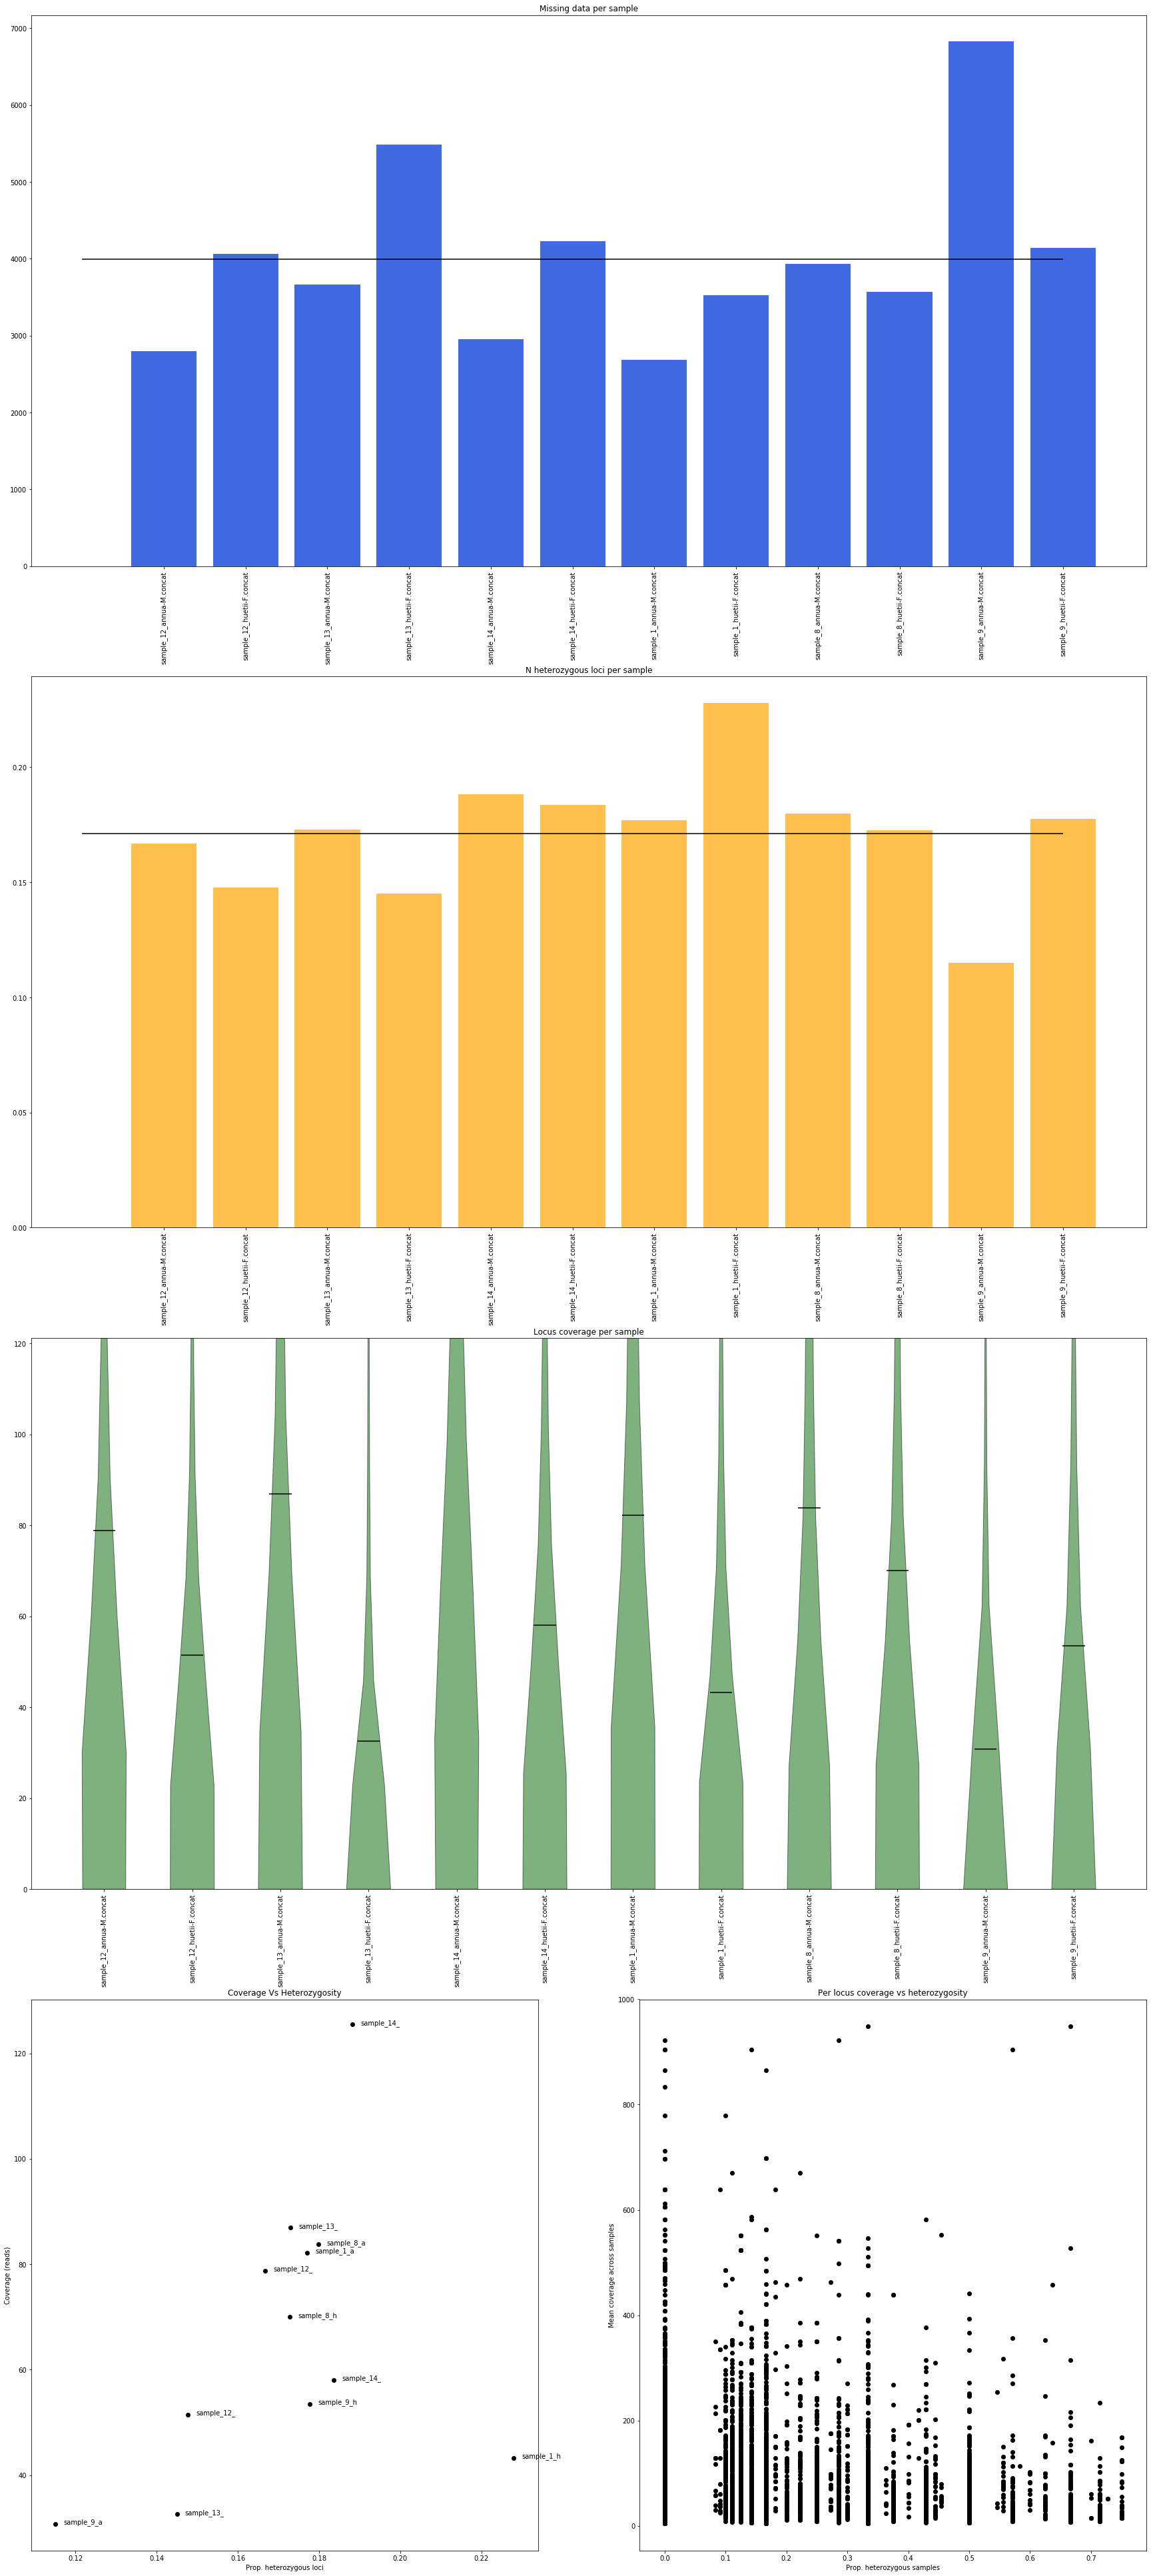

#### DONE ####

Number of Loci = 10210
Average coverage = 66.4158586353 reads


In [7]:
MISC.Summary_plotter(vcf_path, "1111", False)

## Coverage / GC content of a RADtag

I want to test something . . . . I want to take the coverage of a locus and plot it against its GC content, as in something like Blobtools. Maybe it can show contamination in RADseq data. . . 

To do this, I will take loci in a VCF (with relaxed filtering) and for those loci, find the GC content from the catalog

In [1]:
import vcf
import gzip
from mpl_toolkits import mplot3d

In [2]:
myvcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/Fam_1_relaxed//batch_1.vcf", 'r'))

catalog = gzip.open("/home/djeffrie/Data/RADseq/Mercurialis_linkage_maps/Stacks_outputs/batch_1.catalog.tags.tsv.gz", 'r').readlines()
   

In [3]:
record_covs = {}
record_hets = {}

for record in myvcf:
    record_covs[record.ID] = []
    record_hets[record.ID] = []
    for sample in record.samples:
        if sample["DP"] > 0:
            record_covs[record.ID].append(sample["DP"])
        record_hets[record.ID].append(record.heterozygosity)

In [4]:
GCs = {}
            
for SNP_id in record_covs:
    GCs[SNP_id.split("_")[0]] = 0

locus_lines = []

for locus in catalog:
    if locus.split()[2] in GCs:
        locus_lines.append(locus)


In [5]:
for locus in locus_lines:
    GCs[locus.split()[2]] = (locus.split()[8].count("G") + locus.split()[8].count("C"))/len(locus.split()[8])


In [6]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')

for SNP in record_covs:
    ## make colours
    GC_scalar = GCs[SNP.split("_")[0]] /(max(GCs.values()))
    Het_scalar = np.mean(record_hets[SNP])/max(np.mean(i) for i in record_hets.values())
    Cov_scalar = np.mean(record_covs[SNP])/max(np.mean(i) for i in record_covs.values())
    
    #
    plt.scatter(np.mean(record_hets[SNP]), np.mean(record_covs[SNP]), GCs[SNP.split("_")[0]], color = ([GC_scalar,Het_scalar,Cov_scalar]))
    ax.set_xlabel("GC")
    ax.set_ylabel("Heterozygosity")
    ax.set_zlabel("Coverage")
                    
plt.show()

ZeroDivisionError: integer division or modulo by zero